In [1]:
import networkx as nx, matplotlib.pyplot as plt
import numpy as np, pandas as pd
import math

In [2]:
df = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/Data.csv')

In [3]:
GT = nx.Graph()
GT.add_nodes_from(df['character'].tolist(),bipartite=1,node_color='w',alpha=0.4,node_shape='d')

In [4]:
GT.add_nodes_from(df['title'].tolist(),bipartite=0,  node_color='red', alpha=0.4, node_shape='s')
for i in range(len(df.index)):
    GT.add_edge(df.at[i,'title'],df.at[i,'character'])

In [5]:
character_nodes = {n for n, d in GT.nodes(data=True) if d['bipartite'] == 1}
title_nodes = set(GT) - character_nodes

In [6]:
len(character_nodes) # number of characters

1860

In [7]:
len(title_nodes) # titles count

60

In [8]:
len(GT.edges)

2307

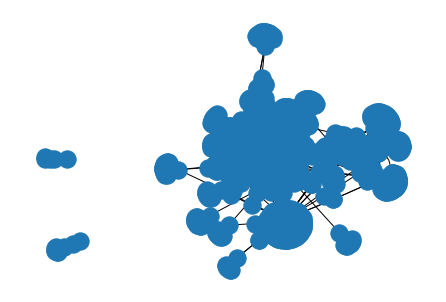

In [9]:
pos = nx.spring_layout(GT)
nx.draw(GT)

In [10]:
list(GT.neighbors('Tony Stark'))
#List of Marvel movies Tony Stark acted

['Iron Man',
 'Iron Man 2',
 'The Avengers',
 'Iron Man 3',
 'Avengers: Age of Ultron',
 'Captain America: Civil War',
 'Spider-Man: Homecoming',
 'Avengers: Infinity War',
 'Avengers: Endgame']

In [11]:
list(GT.neighbors('Avengers: Age of Ultron'))
#Main characters in the Avengers: Age of Ultron

['Tony Stark',
 'Thor',
 'Bruce Banner',
 'Steve Rogers',
 'Natasha Romanoff',
 'Clint Barton',
 'Ultron',
 'Nick Fury',
 'James Rhodes',
 'Pietro Maximoff',
 'Wanda Maximoff',
 'Jarvis',
 'Maria Hill',
 'Sam Wilson',
 'Peggy Carter',
 'Heimdall',
 'Laura Barton',
 'Erik Selvig',
 'Dr. Helen Cho',
 'Strucker',
 'Ulysses Klaue',
 'Madame B',
 'Stan Lee',
 'Dr. List',
 'Fortress Soldier',
 'Strucker Mercenary',
 'Zrinka',
 'Costel',
 'Sokovian Acid Student',
 'Cooper Barton',
 'Lila Barton',
 'Friday',
 'Nathaniel Pietro Barton']

In [12]:
# To find the Similarities between the nodes
def Jaccard_Cosine_Smlrty(G,l):
    num = list(set([n for n in G.neighbors(l[0])]) & set([m for m in G.neighbors(l[1])]))
    print('Common between the',l[0],'and', l[1],'are', num)
    denom_j = list(set([n for n in G.neighbors(l[0])] + [m for m in G.neighbors(l[1])]))
    print('Jaccard Similarity is ', len(num)/len(denom_j))
    denom_c = math.sqrt(len([n for n in G.neighbors(l[0])])*len([n for n in G.neighbors(l[1])]))
    print('Cosine Similarity is', len(num)/denom_c)

In [13]:
l = ['Tony Stark','Steve Rogers']
Jaccard_Cosine_Smlrty(GT,l)

Common between the Tony Stark and Steve Rogers are ['The Avengers', 'Avengers: Age of Ultron', 'Captain America: Civil War', 'Avengers: Infinity War', 'Avengers: Endgame']
Jaccard Similarity is  0.4166666666666667
Cosine Similarity is 0.5892556509887896


In [14]:
l2= ['Avengers: Age of Ultron', 'Avengers: Endgame']
Jaccard_Cosine_Smlrty(GT,l2)

Common between the Avengers: Age of Ultron and Avengers: Endgame are ['Sam Wilson', 'Natasha Romanoff', 'James Rhodes', 'Thor', 'Peggy Carter', 'Friday', 'Lila Barton', 'Tony Stark', 'Laura Barton', 'Clint Barton', 'Nick Fury', 'Bruce Banner', 'Wanda Maximoff', 'Cooper Barton', 'Maria Hill', 'Steve Rogers', 'Jarvis']
Jaccard Similarity is  0.21794871794871795
Cosine Similarity is 0.3758340350425746


Isolated Components

In [15]:
# isolated components
i= nx.number_connected_components(GT)
i

3

In [16]:
[GT.subgraph(c).copy() for c in nx.connected_components(GT)]

In [17]:
#Isolated component
nx.node_connected_component(GT,'Werewolf by Night')

{'Azarel',
 'Barasso',
 'Billy Swan',
 'Elsa Bloodstone',
 'Jack Russell',
 'Jovan',
 'Liorn',
 'Ted (The Man-Thing)',
 'The Flaming Tuba',
 'Ulysses Bloodstone',
 'Verussa',
 'Werewolf by Night'}

In [18]:
nx.node_connected_component(GT,"Marvel One-Shot: Item 47")

{'Agent Blake',
 'Agent Jasper Sitwell',
 'Bennie Pollock',
 'Claire Weiss',
 'Marvel One-Shot: Item 47'}

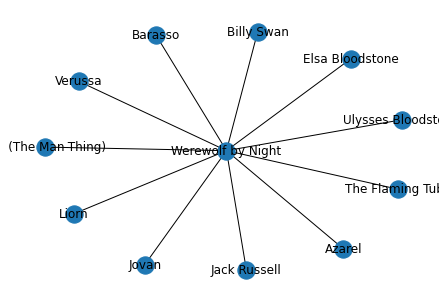

In [19]:
#Isolated Network of Werewolf team 
G_Werewolf = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Werewolf by Night'):
        G_Werewolf.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Werewolf,with_labels=True, font_color='black')

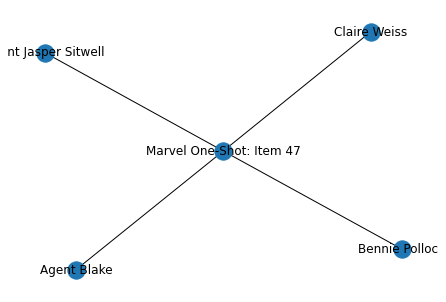

In [20]:
G_Oneshot = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Marvel One-Shot: Item 47'):
        G_Oneshot.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Oneshot,with_labels=True, font_color='black')

In [21]:
def deg_dst(G7): # degree distribution of titles and characters
    degrees = [G7.degree(n) for n in title_nodes]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'title degree distribution')
    plt.legend()
    plt.show()
    degrees1 = [G7.degree(n) for n in character_nodes]
    deg1,freq1 = np.unique(degrees1,return_counts=True)
    plt.plot(deg1,freq1,label = 'characters degree distribution')
    plt.legend()
    plt.show()
def avg_deg_cc(G): # average degree and clustering co-efficient
    avg_cc_G = nx.transitivity(G)
    avg_deg_G = G.degree()
    deg_sum_G =0
    for j in list(avg_deg_G):
        deg_sum_G += j[1]
    avg_deg_G =  deg_sum_G/len(G.nodes())
    return (avg_deg_G, avg_cc_G)

In [22]:
avg_deg_, avg_clstrng_ = avg_deg_cc(GT) 
#print('Average degree of Network', avg_deg_,'clustering co-efficient', avg_clstrng_)

In [23]:
num = 0 
for c in nx.connected_components(GT):
    num += nx.average_shortest_path_length(GT.subgraph(c))*len(GT.subgraph(c))

In [24]:
GT_avg_path = num/len(GT.nodes())

In [25]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)

MU Network 
 
Average degree 2.403125
Average path 4.81965255871013
Average clusteirng 0.0009916895257868273


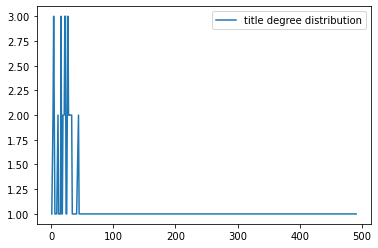

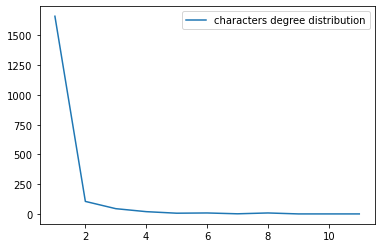

In [26]:
deg_dst(GT)

In [27]:
#des = [GT.degree(n) for n in title_nodes]
titles_dict ={}
characters_dict={}
for n in title_nodes: 
    titles_dict.update({n:GT.degree(n)})
for n in character_nodes:
    characters_dict.update({n:GT.degree(n)})  
#list(des)

In [28]:
#Degrees of Titles and characters
print('Chracters degree',characters_dict)
print('\n titles degree',titles_dict)

Chracters degree {'Uncle Rasheed': 1, 'Kevin Singleton': 1, 'Carla Talbot': 1, 'Reporter 2': 1, 'Alisha Whitley': 1, 'Senator Ellen Nadeer': 1, 'Orville': 1, 'Reva Connors': 2, 'Catherine Starr': 1, 'Leland Owlsley': 1, 'Dr. Noah Burstein': 1, 'Geiger': 1, 'James Montgomery Falsworth': 1, 'D.W. Griffith': 1, 'Karolina Dean': 1, 'Kree Doctor': 1, 'Adina Johnson': 1, 'Domingo Colon': 1, 'Zip': 1, 'Hernan Alvarez': 1, 'Nonna Manfredi': 1, "Meredith's Mother": 1, 'Rebel Leader': 1, 'Philip Cabroni': 1, 'Officer Fitzgibbon': 1, 'General Rick Stoner': 1, 'Gao Lei': 1, 'Tomas': 1, 'Young Hope': 1, 'Steve Wilson': 1, 'Sway Calloway': 1, 'Vin-Tak': 1, 'Birdie': 1, 'Edwin Abbott': 1, 'Yinsen': 1, 'Sonya': 1, 'Toad': 1, 'Char': 1, 'Dave': 3, 'Zuri': 1, 'Dr. List': 2, 'Russell Feldman': 1, 'Dr. Seth Honicky': 1, 'J. Jonah Jameson': 2, 'News Reporter': 1, 'Captain Carter': 1, 'Kourtney': 1, 'Todd Chesterfield': 1, 'Lieutenant Perez': 1, 'Heimdall': 6, 'Young Gordon': 1, 'Drax': 5, 'Sugar': 1, 'Norm

Random Simlated graph

In [29]:
GT_p = avg_deg_ /(len(GT.nodes())-1) # caliculating probability
GT_nodes=len(GT.nodes())
print('Random model probability value',GT_p, 'and length of nodes', GT_nodes)

Random model probability value 0.0012522798332464827 and length of nodes 1920


In [30]:
GT_sim_rndm = nx.gnp_random_graph(GT_nodes, GT_p)

In [31]:
# Simulated Random 
avg_deg_sim, avg_clstrng_sim =  avg_deg_cc(GT_sim_rndm)

In [32]:
avg_clstrng_sim

0.0023584905660377358

Isoloated graphs in network

In [33]:
i= nx.number_connected_components(GT_sim_rndm)
i

226

In [34]:
num = 0 
for c in nx.connected_components(GT_sim_rndm):
    num += nx.average_shortest_path_length(GT_sim_rndm.subgraph(c))*len(GT_sim_rndm.subgraph(c))
GT_sim_avg_path = num/len(GT_sim_rndm.nodes())

In [35]:
print("Random Simulated MU Network \n ")
print("Average degree" ,avg_deg_sim)
print("Average path", GT_sim_avg_path)
print("Average clusteirng", avg_clstrng_sim)


Random Simulated MU Network 
 
Average degree 2.3177083333333335
Average path 7.4617126132930505
Average clusteirng 0.0023584905660377358


MU Network 
 
Average degree 2.403125
Average path 4.81965255871013
Average clusteirng 0.0009916895257868273

Average path is 1.55 times the average path of Random Model Graph 
CLustering co-efficient is 2.37 times the CLustering co-efficient of Random graph

Small World

In [36]:
#Lattice Grah generation
def lattice_graph(G,avg_deg):
    GLat_3 = nx.Graph()
    GLat_3sh = []
    nodes_count = len(G)#len(G.nodes())
    for i in (range(nodes_count)): 
      GLat_3.add_node(i)
      GLat_3sh.append(i)
    new_connections = round(avg_deg/2)
    for i in GLat_3sh:
        nbhr = []
        j=i+1
        for k in range(new_connections):
            if j in GLat_3.nodes():
                nbhr.append(j)
            else:
                j = j - len(GLat_3.nodes)
                nbhr.append(j)
            j+=1 
        for j in nbhr:
            if (GLat_3.has_edge(i,j)==False): 
                GLat_3.add_edge(i,j)  
    return GLat_3

In [37]:
# MU lattice
Lat_MU = lattice_graph(GT,avg_deg_)
print(len(Lat_MU.edges()))

1920


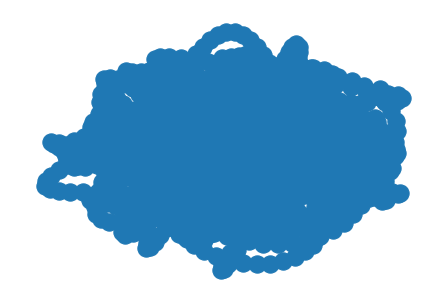

In [38]:
nx.draw(Lat_MU)

In [39]:
avg_clstrng_Lat_MU = nx.transitivity(Lat_MU)
print("lattice Twitch clustering", avg_clstrng_Lat_MU)

BT = 1-((avg_clstrng_/avg_clstrng_Lat_MU) ** (1./3.))
print("Number of nodes", len(GT.nodes), "\n mean degree",avg_deg_,"\n parameter",BT)


lattice Twitch clustering 0


ZeroDivisionError: float division by zero